In [1]:
# General imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import pickle

# Import modeling libraries
from sklearn.linear_model import LinearRegression, LogisticRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
import statsmodels.api as sm

# Q1

In [2]:
# Load training data
q1_df = pd.read_csv('data/Q1TrainData.csv')
q1_df.head(20)

,date,yield,species,region,size_range,dump_size,cooking_time,post_cook_temp
0,2018-07-14,0.584864,Albacore,Indian ocean,4-5,1888.276084,2.066711,66.166377
1,2019-08-28,0.225613,Albacore,Pacific ocean,3-4,2209.729676,1.890274,61.966487
2,2018-12-02,0.428228,Albacore,Pacific ocean,>6,2139.592815,1.869006,64.455046
3,2019-12-29,0.564230,Yellowfin,Indian ocean,1-3,1994.035137,3.002083,66.917412
4,2019-03-24,0.570164,Albacore,Indian ocean,3-4,1843.128772,1.814764,66.077501
5,2018-07-04,0.302579,Albacore,Atlantic ocean,>6,2226.451277,2.180335,64.429268
6,2018-08-10,0.623449,Yellowfin,Indian ocean,4-5,2003.292999,2.839068,67.221478
7,2018-08-11,1.012282,Yellowfin,Pacific ocean,<1,2106.558415,2.355736,70.168799
8,2018-02-12,0.223906,Yellowfin,Atlantic ocean,4-5,2326.727294,3.142960,67.650686
9,2019-09-05,0.493205,Albacore,Atlantic ocean,>6,2253.419159,1.872668,62.512794


## EDA

In [3]:
# General info about training data
q1_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   date            1500 non-null   object 
 1   yield           1500 non-null   float64
 2   species         1500 non-null   object 
 3   region          1500 non-null   object 
 4   size_range      1500 non-null   object 
 5   dump_size       1500 non-null   float64
 6   cooking_time    1500 non-null   float64
 7   post_cook_temp  1500 non-null   float64
dtypes: float64(4), object(4)
memory usage: 93.9+ KB


In [4]:
# Convert date column to datetime type
q1_df['date'] = pd.to_datetime(q1_df['date'])

In [5]:
# Take a look at the categorical data
for col in q1_df.columns:
    if q1_df[col].dtype == 'object':
        print(q1_df[col].unique())

['Albacore' 'Yellowfin']
['Indian ocean' 'Pacific ocean' 'Atlantic ocean']
['4-5' '3-4' '>6' '1-3' '<1' '5-6']


# Data Visualization

/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


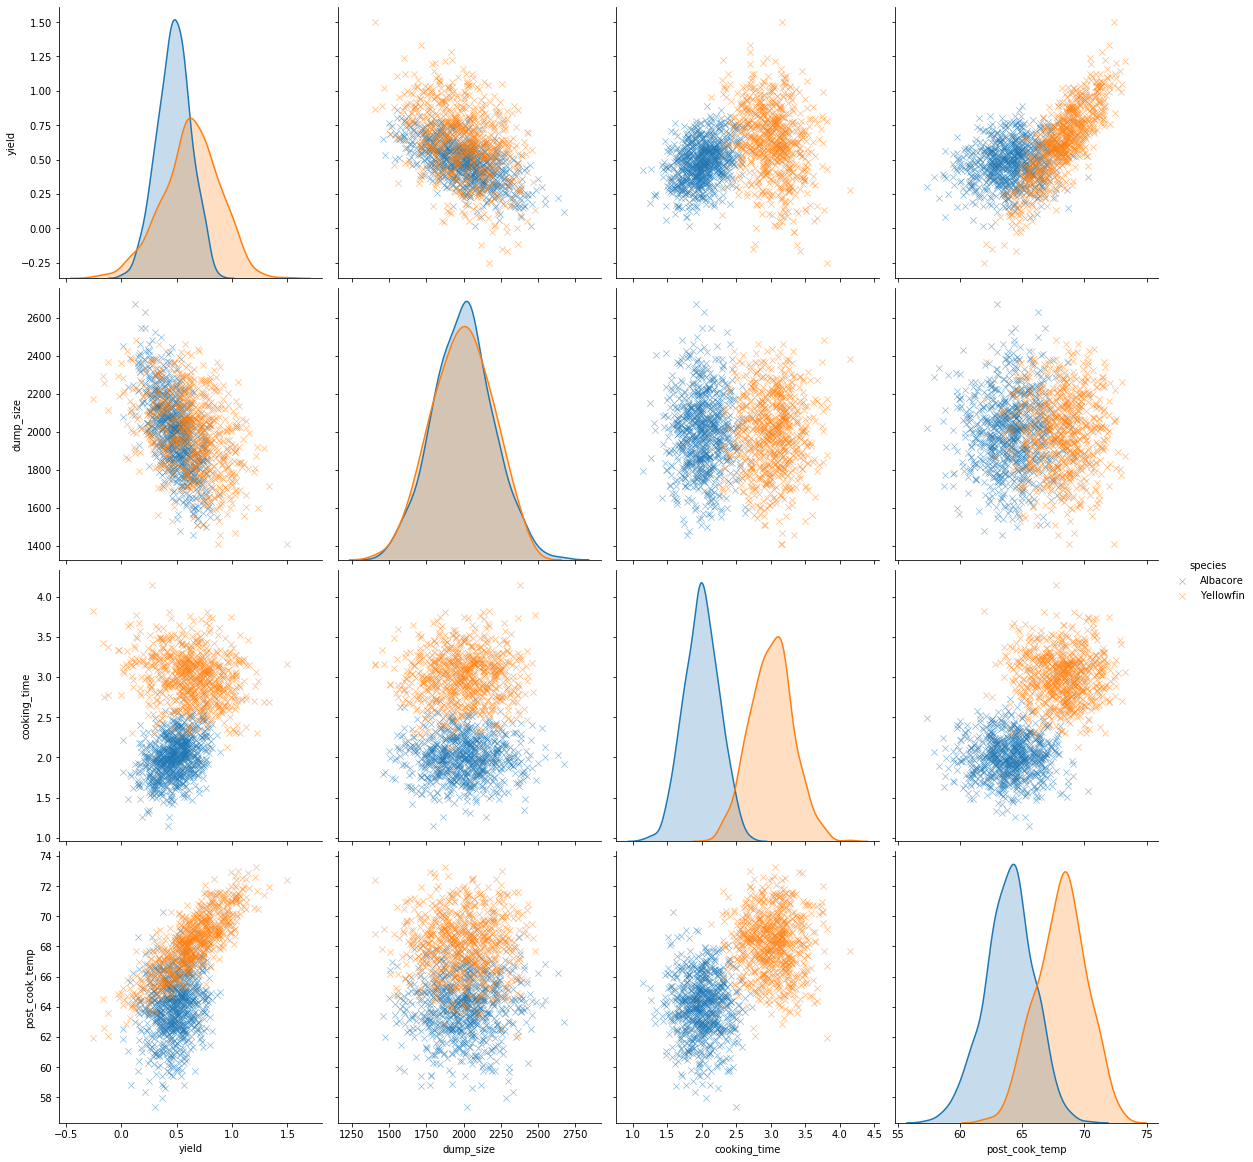

In [6]:
# Plot a pairplot to explore the relationships between features
sns.pairplot(q1_df, 
             hue='species', 
             plot_kws = {'alpha': 0.5, 's': 40, 'edgecolor':'k','marker':'x'},
             size = 4)

/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


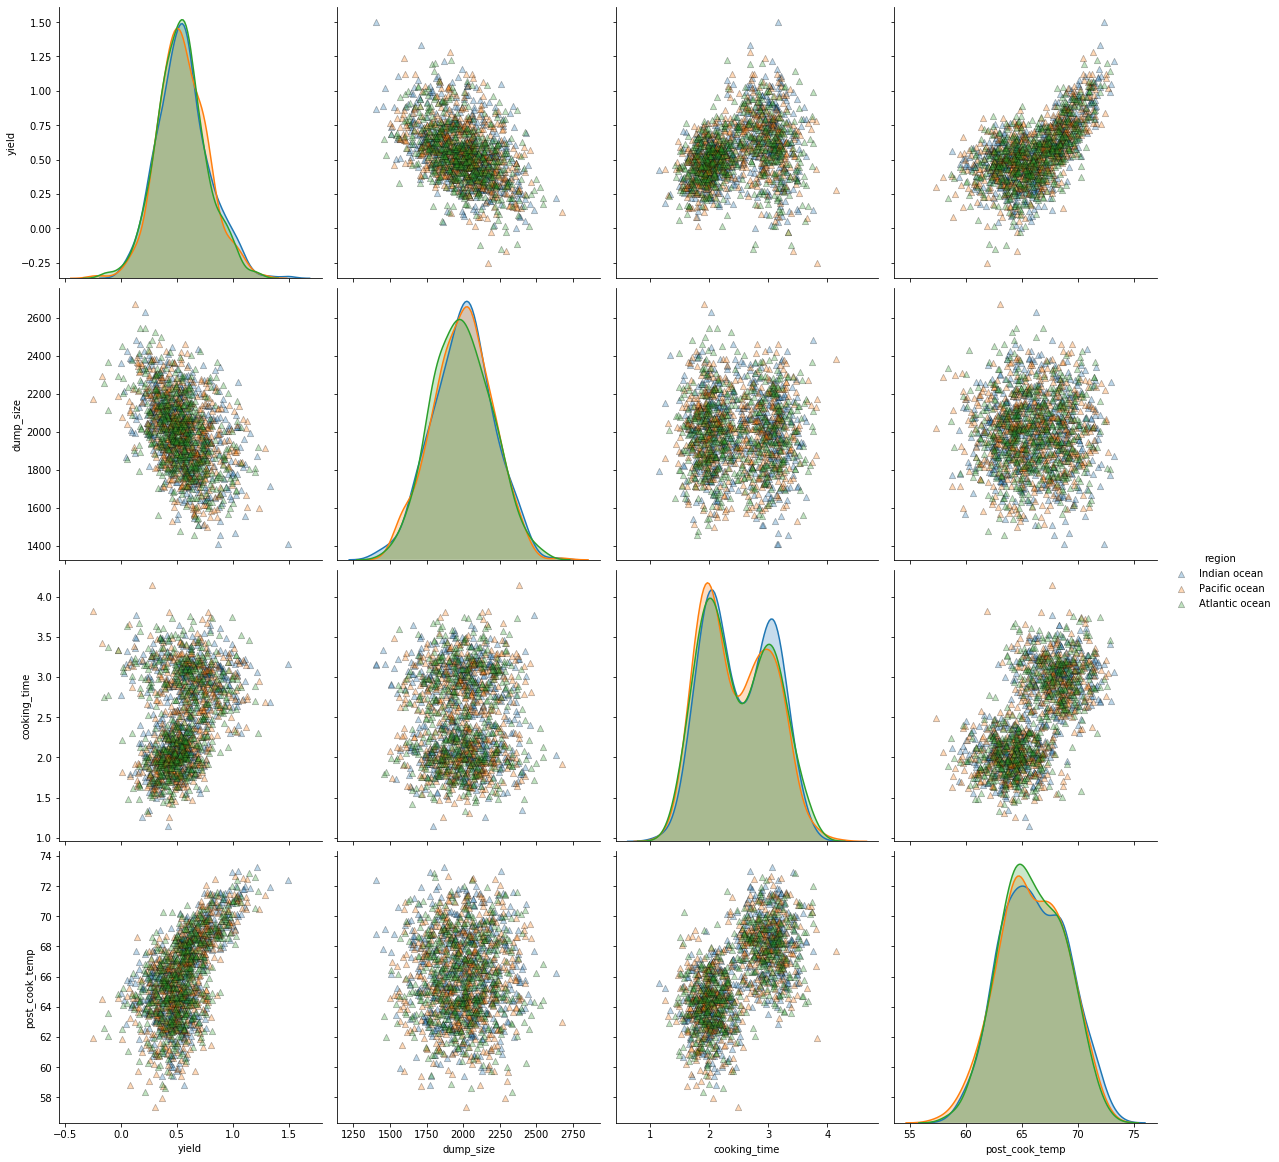

In [7]:
sns.pairplot(q1_df, 
             hue='region',
             plot_kws = {'alpha': 0.3, 's': 40, 'edgecolor':'k', 'marker':'^'},
             size = 4)

/Users/agneshe/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


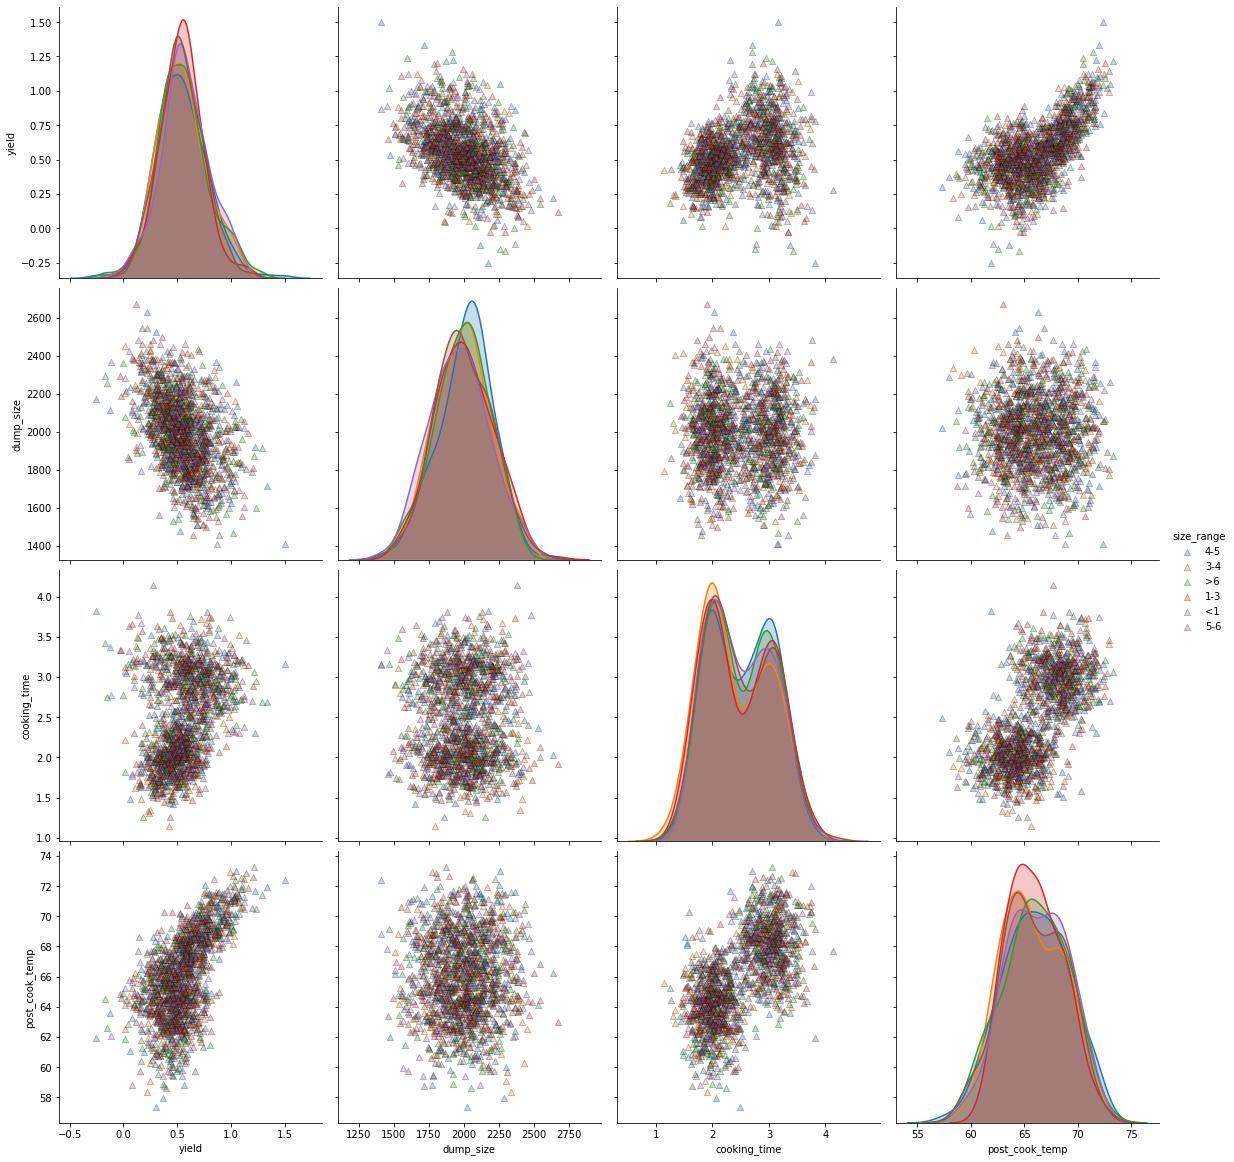

In [8]:
sns.pairplot(q1_df, 
             hue='size_range',
             plot_kws = {'alpha': 0.3, 's': 40, 'edgecolor':'k', 'marker':'^'},
             size = 4)

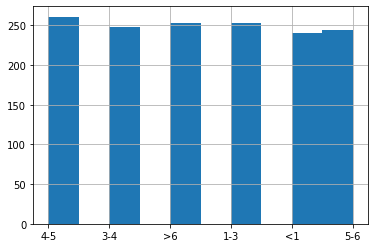

In [9]:
# Plot histograms for the categorical data
q1_df['size_range'].hist()

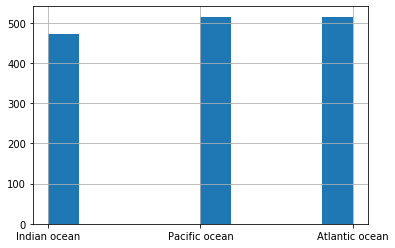

In [10]:
q1_df['region'].hist()

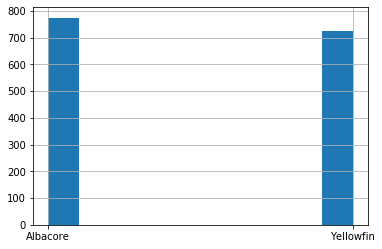

In [11]:
q1_df['species'].hist()

In [7]:
# Check missing data rate
print('Non-zero missing rate(%)')
for col in q1_df.columns:
    print('{}:\t{}%'.format(col, sum(q1_df[col].isnull())*100/len(q1_df)))

Non-zero missing rate(%)
date:	0.0%
yield:	0.0%
species:	0.0%
region:	0.0%
size_range:	0.0%
dump_size:	0.0%
cooking_time:	0.0%
post_cook_temp:	0.0%


## Model

In [113]:
# Convert categoriacal data into dummy variables
q1_df_train = pd.get_dummies(q1_df, columns=['species','region'])

# Convert interval data into mean values
q1_df_train['size_range'] = q1_df['size_range'].replace(dict(zip(('4-5','3-4','>6','1-3','<1','5-6'), 
                                                                       (4.5, 3.5, 6.5, 2, 0.5, 5.5))))

In [115]:
# Splitting data into train and test set 
y = q1_df_train['yield']
X = q1_df_train.drop(['date','yield'], axis=1).to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initializing Regressor
rg = Ridge()
rf = RandomForestRegressor(random_state=2)
gb = GradientBoostingRegressor(random_state=0)

# Setting up the parameter grids
param_grid_rg = [{'alpha' : [0.1, 0.3, 0.5, 0.7, 1.0, 2.0, 3.0, 4.0, 5.0]}]

param_grid_rf = [{'n_estimators' : [10, 50, 100, 250, 500, 1000],
                  'min_samples_leaf' : [1, 3, 5],
                  'max_features': ['sqrt', 'log2']}]

param_grid_gb = [{'learning_rate' : np.linspace(0.1, 1.0, num=10),
                  'n_estimators' : [10, 50, 100, 250, 500, 1000],
                  'max_depth' : [1, 2, 3, 4, 5]}]

In [123]:
# Setting up multiple Gridsearch CV objects, one for each model
gridcvs = {}
inner_cv = KFold(n_splits=3, shuffle=True, random_state=4)

for pgrid, est, name in zip((param_grid_rg, param_grid_rf, param_grid_gb),
                            (rg, rf, gb),
                            ('RidgeRegression', 'RandomForest', 'GradientBoosting')):
    gcv = GridSearchCV(estimator=est,
                       param_grid=pgrid,
                       cv=inner_cv,
                       verbose=0,
                       scoring='neg_mean_squared_error',
                       refit=True)
    gridcvs[name] = gcv

In [125]:
outer_cv = KFold(n_splits=5, shuffle=True, random_state=5)
outer_score = {}

for name, gs_est in sorted(gridcvs.items()):
    nested_score = cross_val_score(gs_est,
                                   X=X_train,
                                   y=y_train,
                                   cv=outer_cv,
#                                    n_jobs=1
                                  )
    outer_scores[name] = nested_score
    print(f'{name}: outer score {nested_score.mean():.5f} +/- {nested_score.std():.5f}')

GradientBoosting: outer score -0.01162 +/- 0.00062
RandomForest: outer score -0.01250 +/- 0.00074
RidgeRegression: outer score -0.02043 +/- 0.00120


In [126]:
# Select GradientBoosting as the best model and fit on the full training set
best_model = 'GradientBoosting'
final_model = gridcvs[best_model]
final_model.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=3, random_state=4, shuffle=True),
             error_score=nan,
             estimator=GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0,
                                                 criterion='friedman_mse',
                                                 init=None, learning_rate=0.1,
                                                 loss='ls', max_depth=3,
                                                 max_features=None,
                                                 max_leaf_nodes=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight...
                                                 random_state=0, subsample=1.0,
                                 

In [127]:
train = mse(y_true=y_train, y_pred=final_model.predict(X_train))
test = mse(y_true=y_test, y_pred=final_model.predict(X_test))

# evaluate performance and compare to cross-validation results
print(f'MSE (mean cross-vaidated score of the best_estimator): {final_model.best_score_:.5f}')
print(f'Best Parameters: {final_model.best_params_}')

print(f'Training MSE: {train:.5f}')
print(f'Test MSE: {test:.5f}')

MSE (mean cross-vaidated score of the best_estimator): -0.01162
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250}
Training MSE: 0.00750
Test MSE: 0.01113


## Train the final model use the whole dataset

In [128]:
model = GradientBoostingRegressor(learning_rate=0.1, 
                                  max_depth=2, 
                                  n_estimators=250)
model.fit(X, y)

# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

## Make prediction on the test dataset

In [129]:
# Load test data
test_df = pd.read_csv('data/Q1TestData.csv')

# Convert categoriacal data into dummy variables
test_df = pd.get_dummies(test_df, columns=['species','region'])
test_df['size_range'] = test_df['size_range'].replace(dict(zip(('4-5','3-4','>6','1-3','<1','5-6'), 
                                                                       (4.5, 3.5, 6.5, 2, 0.5, 5.5))))
test = test_df.drop(['date'], axis=1).to_numpy()

# Make prediction using test data
y_pred = model.predict(test)

# Save prediction to disk
pd.DataFrame(model.predict(test), columns=['predicted_yield']).to_csv('Q1prediction.csv')

## Discussion

After the preliminary EDA, and looking at the pair plot (which can be found in my submitted jupyter notebook ) the relationships between features, I choose to select a model between ridge regression, random forest, and gradient boosting and compare the generalized error for model selection. 

The metric used to compare models was RMSE, which is known as Root-mean-square error for regression models. In statistics, the mean squared error (MSE) of an estimator (of a procedure for estimating an unobserved quantity) measures the average of the squares of the errors—that is, the average squared difference between the estimated values and the actual value. 

The technique used for this dataset is nested cross-validation since the dataset contains 1500 samples, which can be considered as a small dataset. Nested cv is often used to train a model in which hyperparameters also need to be optimized. Nested CV estimates the generalization error of the underlying model and its hyperparameters search. I used a 5x3 nested cv due to the size of the dataset. 

At large, the best model should return the lowest RMSE on both the training dataset and the cv dataset. 

The gradient boosting model has the lowest average RMSE and the optimal values for the hyperparameters was found by doing grid search in the inner loops of the nested cv.

MSE (mean cross-vaidated score of the best_estimator): -0.01162
Best Parameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 250}
Training MSE: 0.00750
Test MSE: 0.01113

Therefore, the gradient boosting regressor is the best model. 

After the model selection and hyper parameter tuning, the final model was trained on the full training set, and the prediction was made and saved using the test set provided. 

# Q2

In [12]:
# Load data
q2_df = pd.read_csv('data/Q2Data.csv')
q2_df.head(10)

,date,yield,species,region,size_range,dump_size
0,2019-06-12,0.495956,Yellowfin,Indian ocean,4-5,1850.962871
1,2019-03-03,0.433514,Yellowfin,Pacific ocean,<1,1668.551412
2,2019-01-14,0.407137,Albacore,Indian ocean,5-6,1794.612138
3,2018-08-01,0.498249,Yellowfin,Indian ocean,1-3,1648.309439
4,2019-05-24,0.494694,Yellowfin,Indian ocean,<1,1987.717638
5,2018-01-12,0.393769,Albacore,Atlantic ocean,4-5,1505.267749
6,2018-09-02,0.478086,Skipjack,Pacific ocean,3-4,2166.776941
7,2018-03-22,0.437041,Yellowfin,Pacific ocean,3-4,2075.616892
8,2019-10-26,0.441611,Yellowfin,Pacific ocean,3-4,2345.494302
9,2018-01-31,0.401977,Yellowfin,Pacific ocean,3-4,2094.661932


In [13]:
q2_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        500 non-null    object 
 1   yield       500 non-null    float64
 2   species     500 non-null    object 
 3   region      500 non-null    object 
 4   size_range  500 non-null    object 
 5   dump_size   500 non-null    float64
dtypes: float64(2), object(4)
memory usage: 23.6+ KB


In [84]:
q2_df.describe()

,yield,size_range,dump_size
count,500.000000,500.000000,500.000000
mean,0.449464,3.758000,2015.077257
std,0.035554,2.006861,222.070641
min,0.392024,0.500000,1443.969484
25%,0.414808,2.000000,1863.541661
50%,0.448459,4.500000,2017.234820
75%,0.482564,5.500000,2169.390770
max,0.512431,6.500000,2661.673363


In [14]:
# Convert date to correct type
q2_df['date'] = pd.to_datetime(q2_df['date'])
print('The dataset contains data from {} to {}'.format(min(q2_df['date']),max(q2_df['date'])))

# Convert interval data into mean values
q2_df['size_range'] = q2_df['size_range'].replace(dict(zip(('4-5','3-4','>6','1-3','<1','5-6'), 
                                                           (4.5, 3.5, 6.5, 2, 0.5, 5.5))))

The dataset contains data from 2018-01-01 00:00:00 to 2019-12-30 00:00:00


In [25]:
# Get unique values for species and region
species = list(q2_df['species'].unique())
regions = list(q2_df['region'].unique())

In [30]:
# Compute means by species
q2_df.groupby('species').mean()['yield']

species
Albacore     0.443921
Skipjack     0.449704
Yellowfin    0.450598
Name: yield, dtype: float64

In [31]:
# Compute means by region
q2_df.groupby('region').mean()['yield']

region
Atlantic ocean    0.451037
Indian ocean      0.448472
Pacific ocean     0.448790
Name: yield, dtype: float64

In [34]:
# Compute means by species and region
q2_df.groupby(['species','region']).mean()['yield']

species    region        
Albacore   Atlantic ocean    0.444410
           Indian ocean      0.436341
           Pacific ocean     0.450085
Skipjack   Atlantic ocean    0.450540
           Indian ocean      0.451074
           Pacific ocean     0.447399
Yellowfin  Atlantic ocean    0.452800
           Indian ocean      0.450223
           Pacific ocean     0.449000
Name: yield, dtype: float64

# Data Visualization

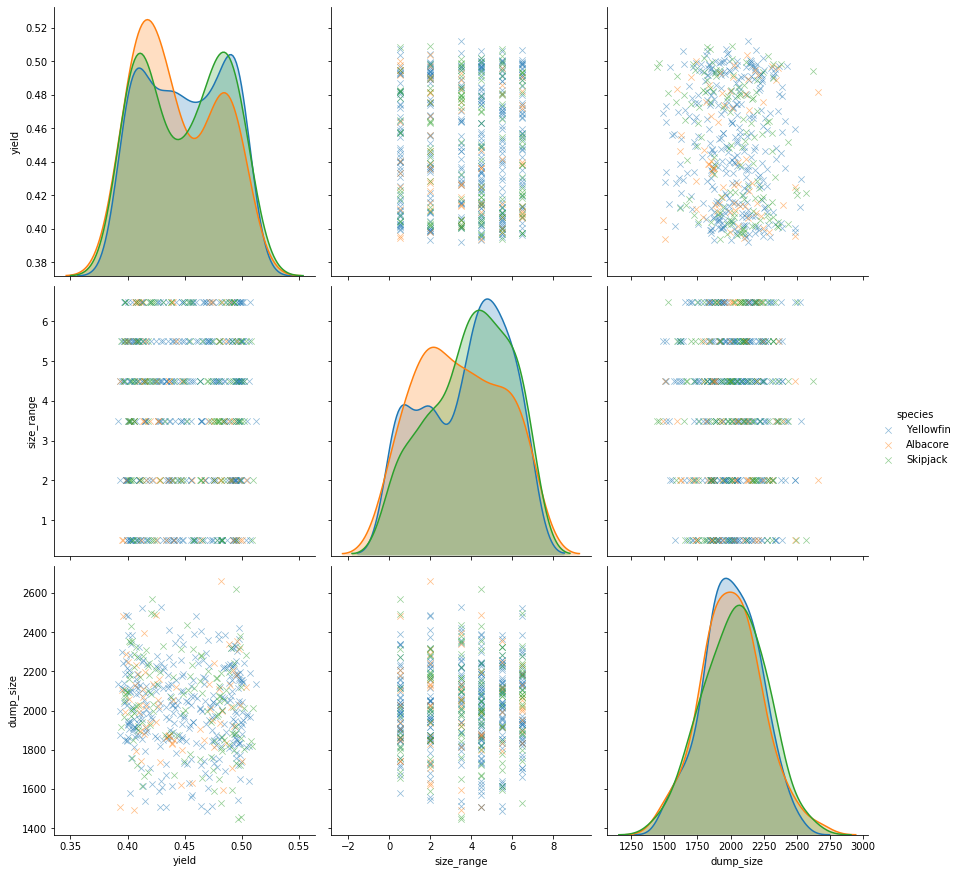

In [83]:
# First plot the pairplot and look at the relationships 
# Different color for different fish spieces
sns.pairplot(q2_df, 
             hue='species', 
             plot_kws = {'alpha': 0.5, 's': 40, 'edgecolor':'k','marker':'x'},
             size
             = 4)
plt.savefig('q2_pairplot.png')

In [36]:
# Seperate the df by species or region 
yellowfin = q2_df[q2_df['species'] == 'Yellowfin']
albacore = q2_df[q2_df['species'] == 'Albacore']
skipjack = q2_df[q2_df['species'] == 'Skipjack']

pacific = q2_df[q2_df['region'] == 'Pacific ocean']
atlantic = q2_df[q2_df['region'] == 'Atlantic ocean']
indian = q2_df[q2_df['region'] == 'Indian ocean']

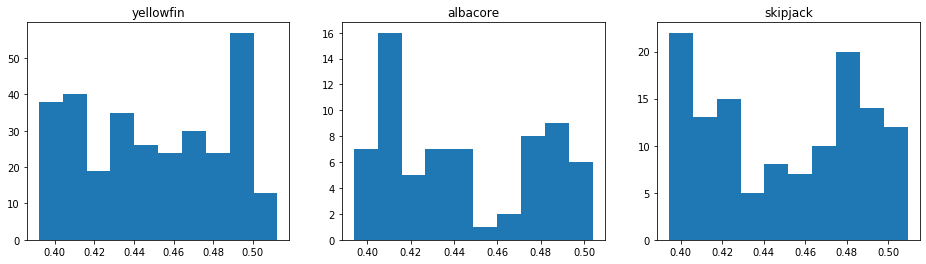

In [107]:
# Plot yield histogram for different species
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
ax1.hist(yellowfin['yield'])
ax2.hist(albacore['yield'])
ax3.hist(skipjack['yield'])
ax1.set_title('yellowfin')
ax2.set_title('albacore')
ax3.set_title('skipjack')
plt.savefig('q2_yieldbyspecies.png')

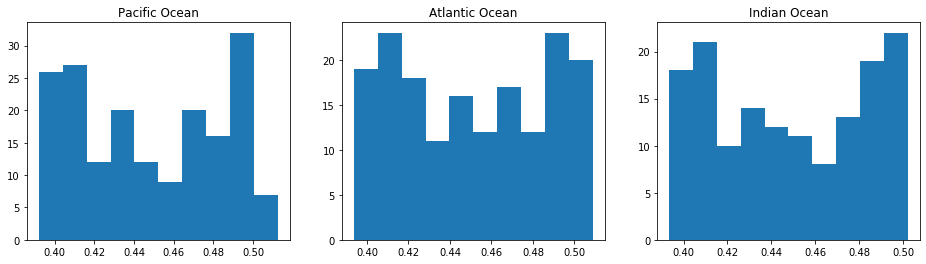

In [108]:
# Plot yield histogram for different region
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(16,4))
ax1.hist(pacific['yield'])
ax2.hist(atlantic['yield'])
ax3.hist(indian['yield'])
ax1.set_title('Pacific Ocean')
ax2.set_title('Atlantic Ocean')
ax3.set_title('Indian Ocean')
plt.savefig('q2_yieldbyregion.png')

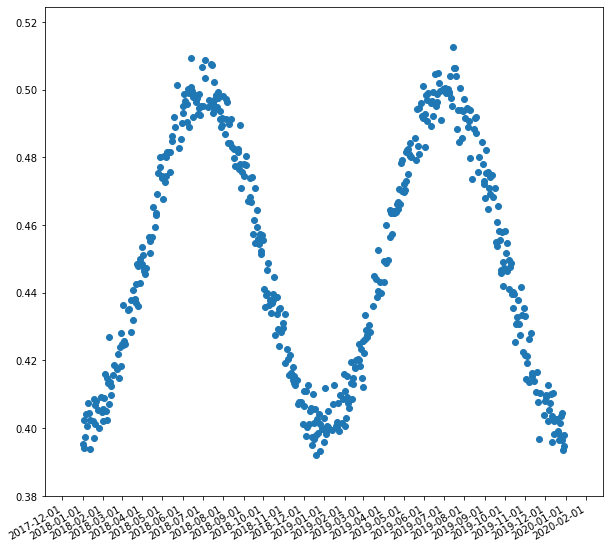

In [19]:
# Plot the yield vs date by month interval
fig, ax = plt.subplots(figsize=(10,10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.scatter(q2_df['date'],q2_df['yield'])
plt.gcf().autofmt_xdate()
plt.savefig('q2_dateVSyield.png')

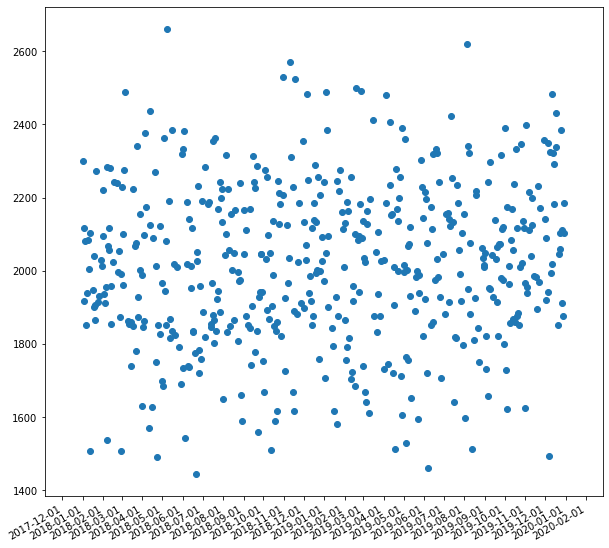

In [20]:
# Plot dump_size vs date by month interval
fig, ax = plt.subplots(figsize=(10,10))
fig.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
fig.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.scatter(q2_df['date'],q2_df['dump_size'])
plt.gcf().autofmt_xdate()
plt.savefig('q2_dateVSdump_size.png')

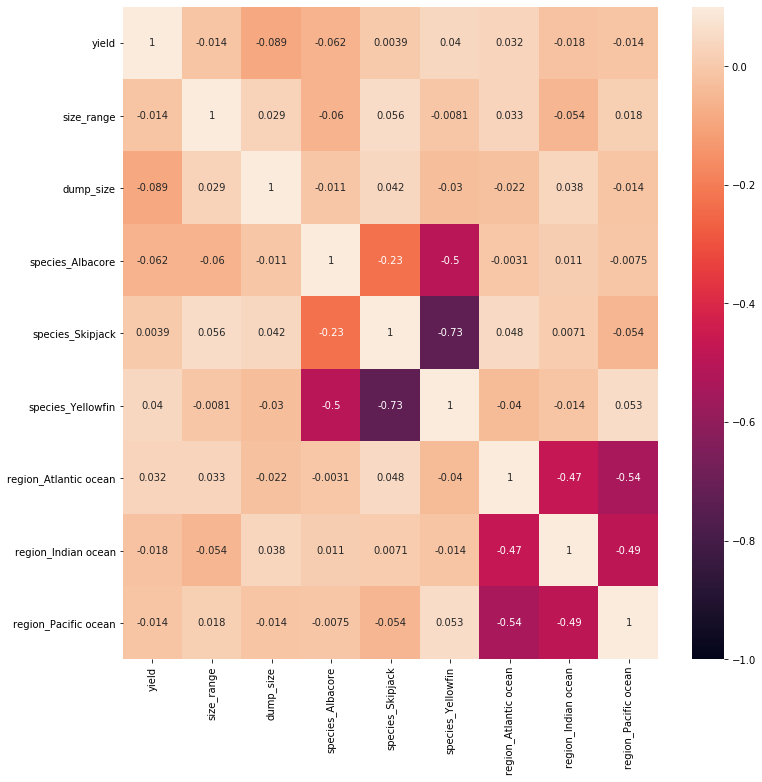

In [24]:
# Convert categoriacal data into dummy variables and save it to a new df
df = pd.get_dummies(q2_df, columns=['species','region'])

# Get the correlation matrix
data = df.drop(['date'],axis=1)
corr = data.corr()

# Plot heatmap for correlation matrix
fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr,vmin=-1, vmax=0.1, annot=True)
plt.savefig('q2_corr.png')

In [61]:
# Manipulating the date to dayofyear, year, and month
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['dayofyear'] = df['date'].dt.dayofyear

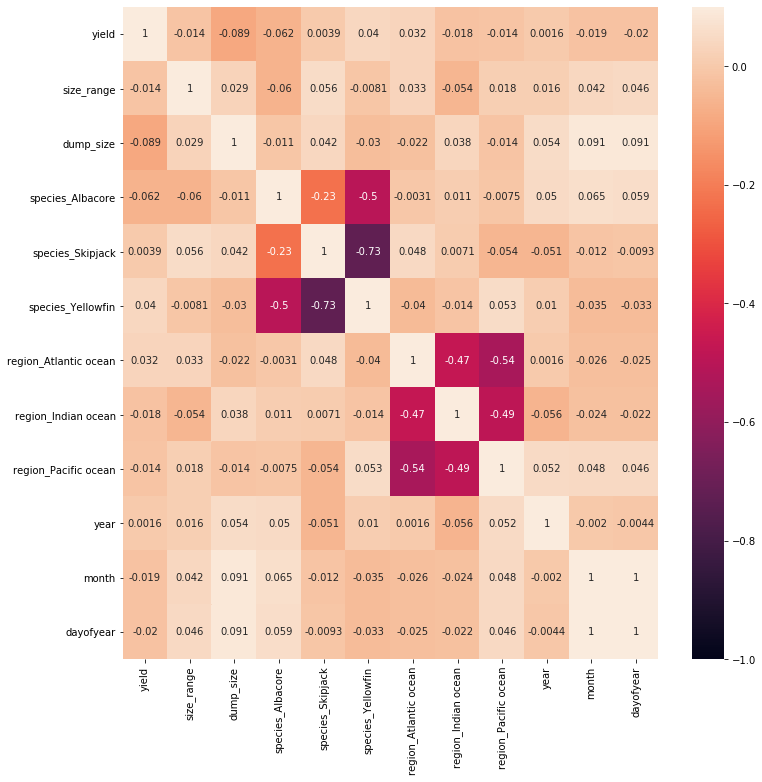

In [97]:
# Plot the correlation matrix again
corr_mat = df.corr()
fig,ax = plt.subplots(figsize=(12,12))
ax = sns.heatmap(corr_mat,vmin=-1, vmax=0.1, annot=True)
plt.savefig('q2_corr2.png')

In [72]:
# Linear Regression for feature importance
y = df['yield']
X = df.drop(['date', 'yield', 'year'], axis=1).to_numpy()

# Using 10 features for linear regression
features = ['size_range', 
            'dump_size', 
            'species_Albacore',
            'species_Skipjack', 
            'species_Yellowfin', 
            'region_Atlantic ocean',
            'region_Indian ocean', 
            'region_Pacific ocean',
            'month', 
            'dayofyear']

# Add constant 
X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  yield   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.8271
Date:                Tue, 29 Sep 2020   Prob (F-statistic):              0.579
Time:                        13:08:54   Log-Likelihood:                 962.72
No. Observations:                 500   AIC:                            -1907.
Df Residuals:                     491   BIC:                            -1870.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2863      0.009     31.216      0.0

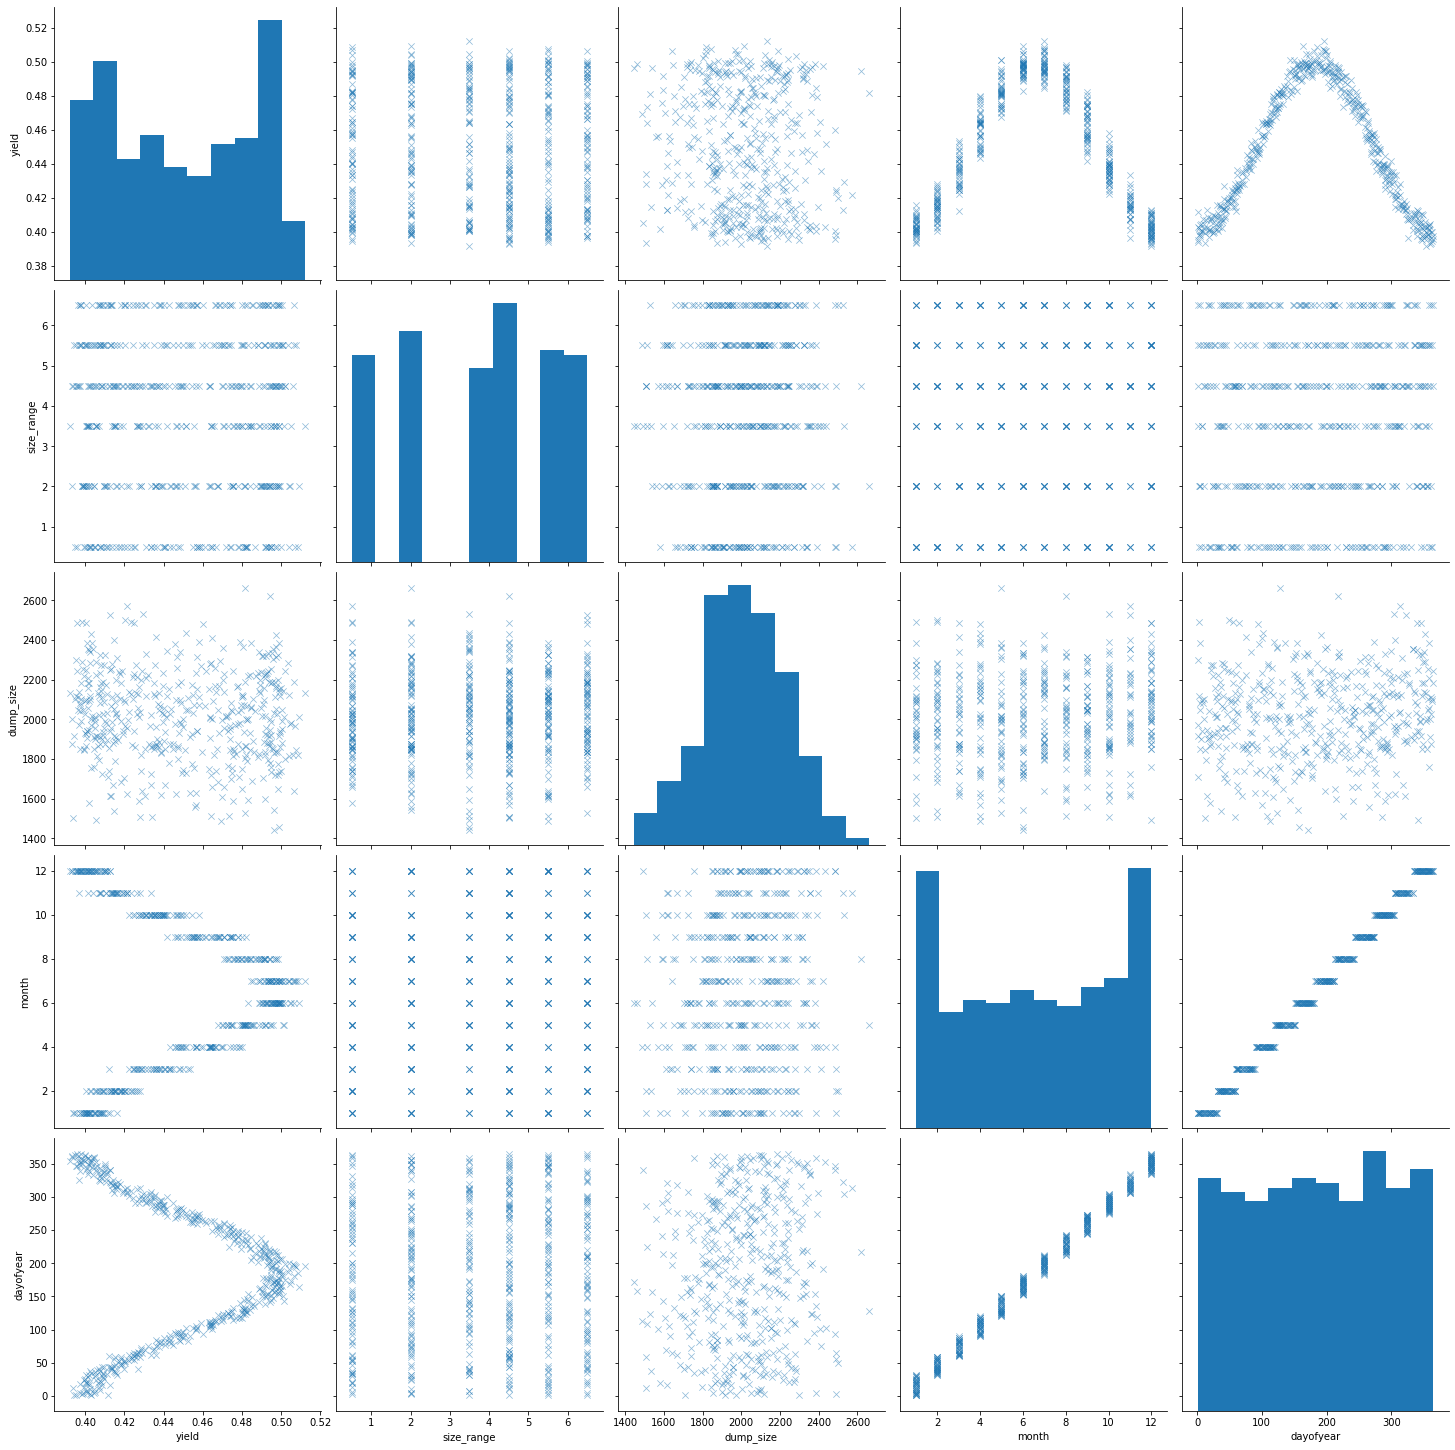

In [110]:
new_df = df.drop(['species_Albacore',
                  'species_Skipjack', 
                  'species_Yellowfin', 
                  'region_Atlantic ocean',
                  'region_Indian ocean', 
                  'region_Pacific ocean',
                  'year'], axis=1)
g = sns.pairplot(new_df, 
#              hue='species', 
             plot_kws = {'alpha': 0.5, 's': 40, 'edgecolor':'k','marker':'x'},
             size
             = 4)
plt.savefig('q2_pairplot2.png')